In [0]:
import numpy as np
import pretty_midi
import os

In [0]:
!pip install pypianoroll
import pypianoroll
from pypianoroll import Multitrack, Track

  Stored in directory: /root/.cache/pip/wheels/ed/f6/fb/5d070524ecf7ba9ed201247a293c01945cfd7f840f8ef338c0
Successfully built pypianoroll
Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)761856/45929032 bytes (1.7%)1572864/45929032 bytes (3.4%)2392064/45929032 bytes (5.2%)3203072/45929032 bytes (7.0%)4022272/45929032 bytes (8.8%)4833280/45929032 bytes (10.5%)5652480/45929032 bytes (12.3%)6471680/45929032 bytes (14.1%)7290880/45929032 bytes (15.9%)8110080/45929032 bytes (17.7%)8929280/4

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from google.colab import drive
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 15.1MB/s 


In [0]:
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
num_classes = 7
note_shift = 24
num_of_notes = 83

In [0]:
output_dir = '/content/gdrive/My Drive/Senior Design Project/MIDI Output Data/Tests/'
os.chdir(output_dir)

In [0]:
pmz = pretty_midi.PrettyMIDI(output_dir + 'amma-demo2-050119.mid')

In [0]:
multitrack_before = Multitrack()
multitrack_before.parse_pretty_midi(pmz)

In [0]:
import matplotlib.pyplot as plt

In [0]:
def adjust_downbeats(tick_rate):
    new_downbeat = []
    for i in range(0, len(multitrack_before.downbeat)):
        if i % tick_rate == 0:
            new_downbeat.append(True)
        else:
            new_downbeat.append(False)
    multitrack_before.downbeat = new_downbeat
            

In [0]:
adjust_downbeats(24)

In [0]:
print(multitrack_before.downbeat)
print(len(multitrack_before.downbeat))

downbeats = multitrack_before.get_downbeat_steps()
print(downbeats)
new_downbeats = []
for beat in downbeats:
    new_downbeats.append(beat/384 * pmz.get_end_time())
print(new_downbeats)
print(pmz.get_end_time())
print(pmz.time_to_tick(pmz.get_end_time()))
print(pmz.tick_to_time(24))
print(pmz.get_piano_roll().shape)
print(pmz.resolution)

[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

In [0]:
from bisect import bisect_left

In [0]:
def take_closest(myList, myNumber):
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return after
    else:
        return before

In [0]:
def slide_notes(instrument):
    for note in instrument.notes:
        closest_start = take_closest(new_downbeats, note.start)
        closest_end = take_closest(new_downbeats, note.end)
        difference_start = abs(closest_start - note.start)
        difference_end = abs(closest_end - note.end)
        
        if difference_start <= difference_end:
            if closest_start < note.start:
                note.start = closest_start
                note.end = note.end - difference_start
            else:
                note.start = closest_start
                note.end = note.end + difference_start
        else:
            if closest_end > note.end:
                note.start = note.start + difference_end
                note.end = closest_end
            else:
                note.start = note.start - difference_end
                note.end = closest_end
        

In [0]:
for instrument in pmz.instruments:
    if instrument.name != 'Melody':
        slide_notes(instrument)

In [0]:
multitrack_after = Multitrack()
multitrack_after.parse_pretty_midi(pmz)

Bass Before


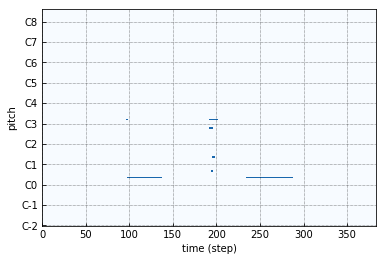

Bass After


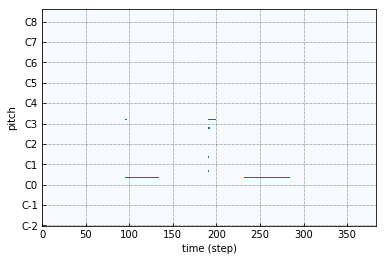

In [0]:
for track in multitrack_before.tracks:
    print(track.name + ' Before')
    fig, ax = track.plot()
    plt.show()
        
for track in multitrack_after.tracks:
    print(track.name + ' After')
    fig, ax = track.plot()
    plt.show()

In [0]:
pypianoroll.write(multitrack_after, output_dir + 'amma-demo1-downbeat-shift-42619.mid')